Failed to read: C:\Users\dell\Downloads\Diabeties.xlsx --> [Errno 2] No such file or directory: 'C:\\Users\\dell\\Downloads\\Diabeties.xlsx'
Excel file read successfully from: C:\Users\dell\Downloads\Diabeties.xls


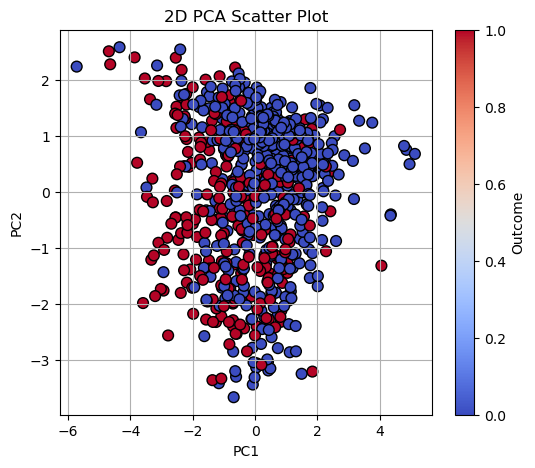

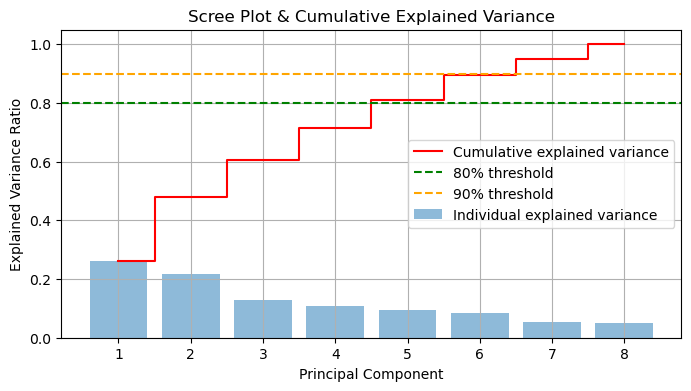

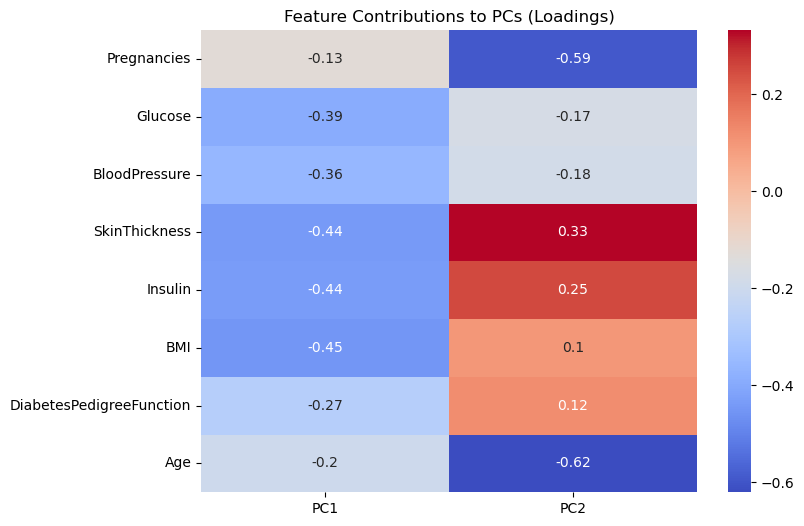

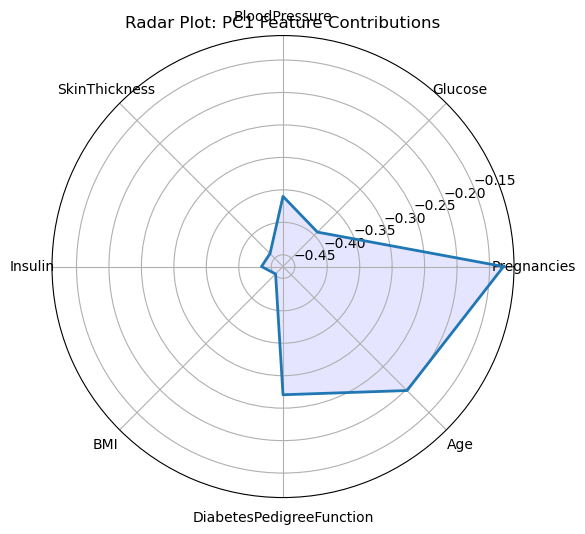

In [1]:
# ------------------------------
# PCA Visualization for Medical Dataset
# ------------------------------

# Step 0: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import pi

# ------------------------------
# STEP 1: LOAD DATA
# ------------------------------
# Try both .xlsx and .xls paths
file_paths = [
    r"C:\Users\dell\Downloads\Diabeties.xlsx",
    r"C:\Users\dell\Downloads\Diabeties.xls"
]

df = None
for path in file_paths:
    try:
        df = pd.read_excel(path)
        print(f"Excel file read successfully from: {path}")
        break
    except Exception as e:
        print(f"Failed to read: {path} --> {e}")

if df is None:
    raise SystemExit("No Excel file could be read. Check file paths and formats!")

# Separate numeric features and target
X = df.select_dtypes(include=[np.number]).drop(columns=['Outcome'], errors='ignore').values
feature_names = df.select_dtypes(include=[np.number]).drop(columns=['Outcome'], errors='ignore').columns
y = df['Outcome'].values if 'Outcome' in df.columns else None

# ------------------------------
# STEP 2: STANDARDIZE DATA
# ------------------------------
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_std = (X - mean) / std

# ------------------------------
# STEP 3: PCA (Eigen Decomposition)
# ------------------------------
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

# ------------------------------
# STEP 4: PROJECT DATA ONTO FIRST 2 PCs
# ------------------------------
V = eigenvectors[:, :2]  # first 2 principal components
X_pca = X_std @ V

# ------------------------------
# STEP 5: PLOT 2D PCA SCATTER
# ------------------------------
plt.figure(figsize=(6,5))
if y is not None:
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', s=60)
    plt.colorbar(label='Outcome')
else:
    plt.scatter(X_pca[:,0], X_pca[:,1], color='blue', edgecolor='k', s=60)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Scatter Plot")
plt.grid(True)
plt.show()

# ------------------------------
# STEP 6: SCREE PLOT & CUMULATIVE VARIANCE
# ------------------------------
plt.figure(figsize=(8,4))
plt.bar(range(1, len(eigenvalues)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(eigenvalues)+1), cumulative_variance, where='mid', color='red', label='Cumulative explained variance')
plt.axhline(y=0.8, color='green', linestyle='--', label='80% threshold')
plt.axhline(y=0.9, color='orange', linestyle='--', label='90% threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# STEP 7: HEATMAP OF FEATURE CONTRIBUTIONS
# ------------------------------
# Contribution of each feature to first 2 PCs (loadings)
loadings = eigenvectors[:, :2]
plt.figure(figsize=(8,6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=['PC1','PC2'], yticklabels=feature_names)
plt.title("Feature Contributions to PCs (Loadings)")
plt.show()

# ------------------------------
# STEP 8: RADAR PLOT FOR PC1
# ------------------------------
labels = feature_names
num_vars = len(labels)
values = eigenvectors[:,0]  # PC1 loadings
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
values = np.concatenate((values,[values[0]]))  # close the loop
angles += [angles[0]]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', label='PC1')
ax.fill(angles, values, 'b', alpha=0.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Radar Plot: PC1 Feature Contributions", size=12)
ax.grid(True)
plt.show()

PROGRAM STARTED

Failed to read: C:\Users\dell\Downloads\Diabeties.xlsx --> [Errno 2] No such file or directory: 'C:\\Users\\dell\\Downloads\\Diabeties.xlsx'
Excel file read successfully from: C:\Users\dell\Downloads\Diabeties.xls
Numeric data loaded and standardized.



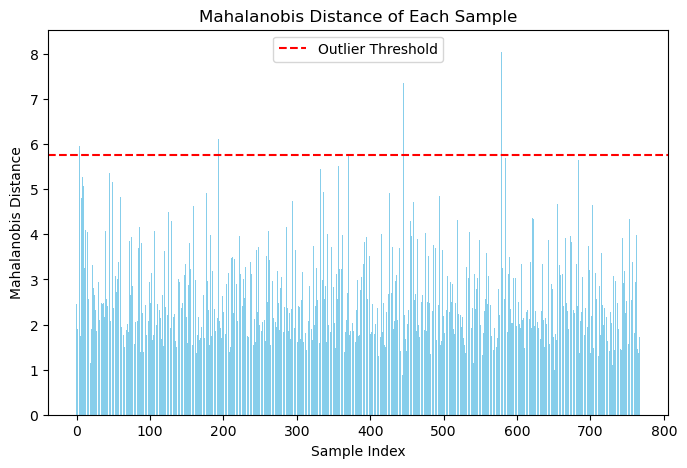

SVD singular values:
 [40.10590727 36.4632608  28.12037943 25.9307984  24.19670408 22.89669413
 17.95602478 17.62460929]


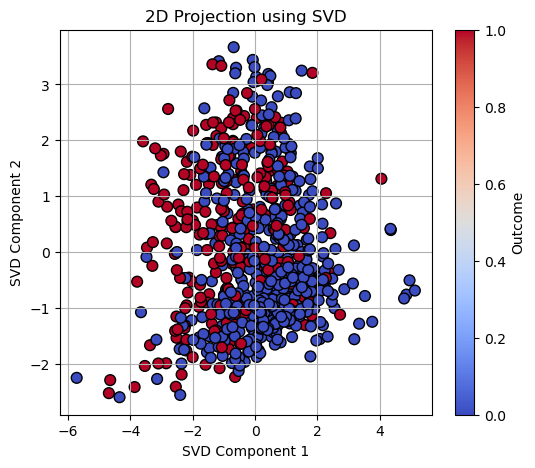

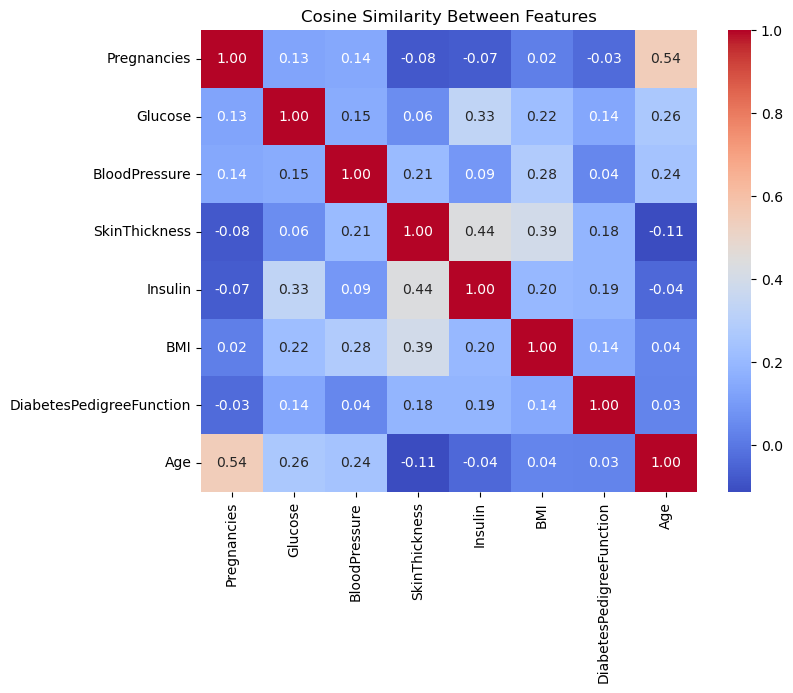

Matrix Rank: 8
Null Space Shape: (8, 0)


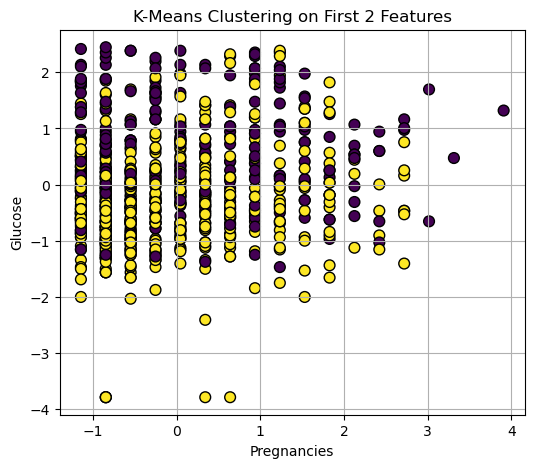


PROGRAM FINISHED SUCCESSFULLY


In [2]:
# ==================================================
# Advanced Linear Algebra Analysis on Diabetes Dataset
# ==================================================

# Step 0: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy.linalg import svd, null_space
from math import pi
import os

print("PROGRAM STARTED\n")

# ---------------- STEP 1: LOAD DATA ----------------
file_paths = [
    r"C:\Users\dell\Downloads\Diabeties.xlsx",
    r"C:\Users\dell\Downloads\Diabeties.xls"
]

df = None
for path in file_paths:
    try:
        df = pd.read_excel(path)
        print(f"Excel file read successfully from: {path}")
        break
    except Exception as e:
        print(f"Failed to read: {path} --> {e}")

if df is None:
    raise SystemExit("No Excel file could be read.")

# ---------------- STEP 2: SELECT NUMERIC FEATURES ----------------
X = df.select_dtypes(include=[np.number]).drop(columns=['Outcome'], errors='ignore').values
feature_names = df.select_dtypes(include=[np.number]).drop(columns=['Outcome'], errors='ignore').columns
y = df['Outcome'].values if 'Outcome' in df.columns else None

# Standardize
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

print("Numeric data loaded and standardized.\n")

# ==================================================
# 1. Mahalanobis Distance
# ==================================================
cov_matrix = np.cov(X_std.T)
inv_covmat = np.linalg.inv(cov_matrix)
mean_vec = np.mean(X_std, axis=0)

mahal_dist = [distance.mahalanobis(x, mean_vec, inv_covmat) for x in X_std]

# Plot Mahalanobis distances
plt.figure(figsize=(8,5))
plt.bar(range(len(mahal_dist)), mahal_dist, color='skyblue')
plt.axhline(y=np.mean(mahal_dist)+3*np.std(mahal_dist), color='red', linestyle='--', label='Outlier Threshold')
plt.xlabel("Sample Index")
plt.ylabel("Mahalanobis Distance")
plt.title("Mahalanobis Distance of Each Sample")
plt.legend()
plt.show()

# ==================================================
# 2. Singular Value Decomposition (SVD)
# ==================================================
U, S, VT = svd(X_std, full_matrices=False)
print("SVD singular values:\n", S)

# Compare first 2 components with PCA
X_svd_2 = U[:, :2] * S[:2]

plt.figure(figsize=(6,5))
if y is not None:
    plt.scatter(X_svd_2[:,0], X_svd_2[:,1], c=y, cmap='coolwarm', edgecolor='k', s=60)
    plt.colorbar(label='Outcome')
else:
    plt.scatter(X_svd_2[:,0], X_svd_2[:,1], color='blue', edgecolor='k', s=60)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("2D Projection using SVD")
plt.grid(True)
plt.show()

# ==================================================
# 3. Feature Vector Analysis (Cosine Similarity)
# ==================================================
num_features = X_std.shape[1]
cos_sim_matrix = np.zeros((num_features, num_features))

for i in range(num_features):
    for j in range(num_features):
        cos_sim_matrix[i,j] = np.dot(X_std[:,i], X_std[:,j]) / (np.linalg.norm(X_std[:,i]) * np.linalg.norm(X_std[:,j]))

plt.figure(figsize=(8,6))
sns.heatmap(cos_sim_matrix, annot=True, fmt=".2f", xticklabels=feature_names, yticklabels=feature_names, cmap='coolwarm')
plt.title("Cosine Similarity Between Features")
plt.show()

# ==================================================
# 4. Rank and Null Space
# ==================================================
rank = np.linalg.matrix_rank(X_std)
ns = null_space(X_std)

print(f"Matrix Rank: {rank}")
print(f"Null Space Shape: {ns.shape}")
if ns.size > 0:
    print("Null space vectors (indicate linear dependencies):\n", ns)

# ==================================================
# 5. Optional: Clustering Visualization
# ==================================================
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_std)

plt.figure(figsize=(6,5))
plt.scatter(X_std[:,0], X_std[:,1], c=clusters, cmap='viridis', edgecolor='k', s=60)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("K-Means Clustering on First 2 Features")
plt.grid(True)
plt.show()

print("\nPROGRAM FINISHED SUCCESSFULLY")


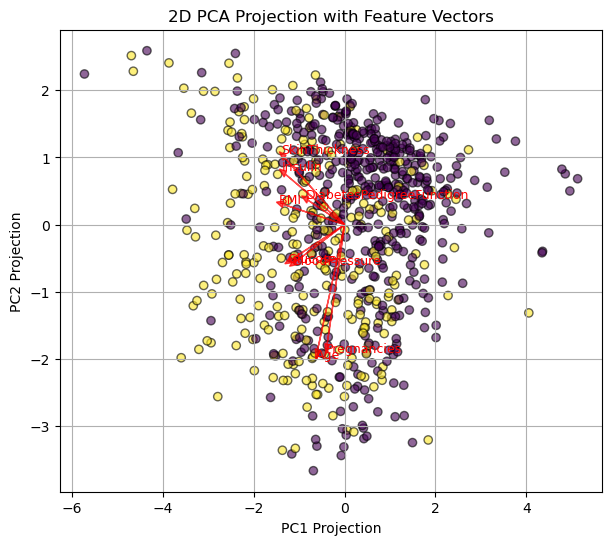

In [3]:
# ==================================================
# 3. Feature Vector Analysis: PCA Loadings as Vectors
# ==================================================
# Compute covariance matrix and PCA eigenvectors
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# Take first 2 PCs
PC_vectors = eigenvectors[:, :2]

plt.figure(figsize=(7,6))
plt.scatter(X_std @ PC_vectors[:,0], X_std @ PC_vectors[:,1], c=y if y is not None else 'gray', edgecolor='k', alpha=0.6)
plt.xlabel("PC1 Projection")
plt.ylabel("PC2 Projection")
plt.title("2D PCA Projection with Feature Vectors")

# Plot feature vectors as arrows
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, 
              PC_vectors[i,0]*3, PC_vectors[i,1]*3,  # scaled for visibility
              color='r', alpha=0.7, head_width=0.1)
    plt.text(PC_vectors[i,0]*3.2, PC_vectors[i,1]*3.2, feature, color='r', fontsize=9)

plt.grid(True)
plt.show()
